## MSM analyis for: Allosteric effects in a catalytically impaired variant of Cyclophilin A are unrelated to millisecond time scale motions


This jupyter notebook contains the MSM analysis of the 4 side chain residues R55, P113, M61 and S/T99 for wildtype and mutant protein. The analysis was carried out with pyemma version 2.3.2.

Other dependencies:
- seaborn
- itertools

### Instructions

1. Unzip (bzip2) the dihedral trajectory files in the directories: dihedral_trajectories, mut_cos_sin and wt_cos_sin
2. Run this notebook 

### Imports

In [1]:
%pylab inline
import pyemma
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
import seaborn as sbn
import glob
import itertools
import os
sbn.set_style("white")
sbn.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sbn.set_context("paper", font_scale=2)
rc={"lines.linewidth": 2}

Populating the interactive namespace from numpy and matplotlib


In [2]:
print pyemma.__version__

2.3.2


### Helper Functions

In [3]:
def get_chi_per_state_list(dtraj, data, state, descriptor):
    '''
    Parameters
    ----------
    dtraj : list
        list of list containing discrete state trajectories
    data : 2-D array
        array containing input data dihedrals
    state : int
        integer of state we are interested in
    descriptor : int
        integer of the column containing particular dihedral of interest
    Returns
    -------
    chi_list : list
        merged list of dihedrals for a given microstate
    '''
    all_state_frames = []
    for d in dtraj:
        all_state_frames.append(np.where(d==state)[0])
    chi_1 = []
    for i in range(len(all_state_frames)):
        if len(all_state_frames[i])> 0:
            chi_1.append(np.degrees(data[i][all_state_frames[i]][:,descriptor]))
    merged = list(itertools.chain.from_iterable(chi_1))
    return merged

In [4]:
def get_per_state_dihedrals(dtrajs, data, column):
    per_state_dih = []
    for i in range(len(centers)):
        per_state_dih.append(get_chi_per_state_list(dtrajs, data, i, column))
    return per_state_dih

In [5]:
def hist_state_plot(chi, cluster):
    y,binEdges=np.histogram(chi[cluster],bins=20, normed=True)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    return bincenters,y

In [6]:
def coarse_grained_states(state_list, chi_list):
    '''
    Parameters
    ----------
    state_list : list
        corase grained indices list
    chi_list : list of lists
        per cluster list of dihedrals
    Returns
    -------
    chi_list : list
        merged list for all chis of the coarse grained states
    '''
    new_list = []
    for s in state_list:
        new_list.append(chi_list[s])
    merged = list(itertools.chain.from_iterable(new_list))
    return merged

/Users/toni_brain/miniconda3/envs/py2k/lib/python2.7/site-packages/pyemma/__init__.py:91: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.4, you have 2.3.2.
  .format(latest=latest, current=current), category=UserWarning)


In [7]:
def hist_coarse_grained(chi):
    y,binEdges=np.histogram(chi,bins=20, normed=True)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    return bincenters,y

In [8]:
def mfpt(M, set1, set2):
    samples = M.sample_f('mfpt', set1, set2)
    mean = np.mean(samples)
    std = np.std(samples)
    return mean,std

## 1. Reading in data for Wildtype and S99T mutant from dihedral trajectories

### S99T mutant

In [9]:
mut_dihedral = []
for i in range(11):
    mut_dihedral.append(np.loadtxt('dihedral_trajectories/dihedral_mut'+str(i)+'.dat'))

In [10]:
data_mut = []
for i in range(11):
    data_mut.append(np.loadtxt('mut_cos_sin/dihedral_mut_sin_cos_true'+str(i)+'.dat'))

### WT

In [11]:
wt_dihedral = []
for i in range(10):
    wt_dihedral.append(np.loadtxt('dihedral_trajectories/dihedral_wt'+str(i)+'.dat'))

In [12]:
data = []
for i in range(10):
    data.append(np.loadtxt('wt_cos_sin/dihedral_wt_sin_cos_true'+str(i)+'.dat'))

## 2. Clustering

In [13]:
# joining data for clustering
for i in range(len(data_mut)):
    data.append(data_mut[i])

In [14]:
if os.path.exists('cluster_centers.dat'):
    centers = np.loadtxt('cluster_centers.dat')
    dtrajs_all = coor.assign_to_centers(data,centers)
else:
    cl = coor.cluster_kmeans(data,k=100, max_iter=50)
    np.savetxt('cluster_centers.dat', cl.clustercenters)
    dtrajs_all = cl.dtrajs

In [15]:
dtrajs_mut = dtrajs_all[10:]
dtrajs_wt = dtrajs_all[:10]

## 3. Implied timescales

In [16]:
#mutant
its_mut = msm.timescales_msm(dtrajs_mut, lags=200, nits=10, errors='bayes')

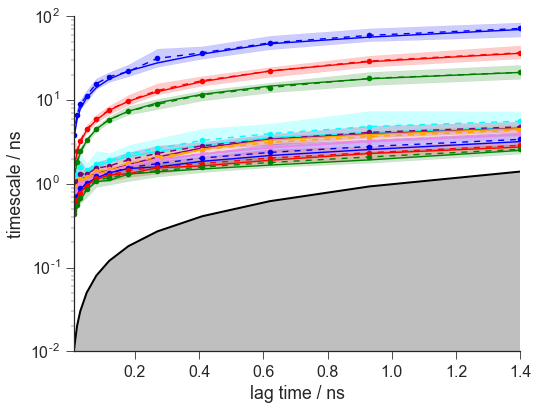

In [17]:
fig =figure(figsize(8,6))
mplt.plot_implied_timescales(its_mut, ylog=True, units='ns', dt=0.01)
sbn.despine()

In [18]:
#wt
its_wt = msm.timescales_msm(dtrajs_wt, lags=200, nits=10, errors='bayes')

Exception in thread Thread-41:
Traceback (most recent call last):
  File "/Users/toni_brain/miniconda3/envs/py2k/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/Users/toni_brain/miniconda3/envs/py2k/lib/python2.7/threading.py", line 1073, in run
    self.function(*self.args, **self.kwargs)
  File "/Users/toni_brain/miniconda3/envs/py2k/lib/python2.7/site-packages/progress_reporter/bar/gui.py", line 89, in hide_widget
    widget.close()
  File "/Users/toni_brain/miniconda3/envs/py2k/lib/python2.7/site-packages/ipywidgets/widgets/widget.py", line 221, in close
    Widget.widgets.pop(self.model_id, None)
  File "/Users/toni_brain/miniconda3/envs/py2k/lib/python2.7/site-packages/ipywidgets/widgets/widget.py", line 208, in model_id
    return self.comm.comm_id
AttributeError: 'NoneType' object has no attribute 'comm_id'



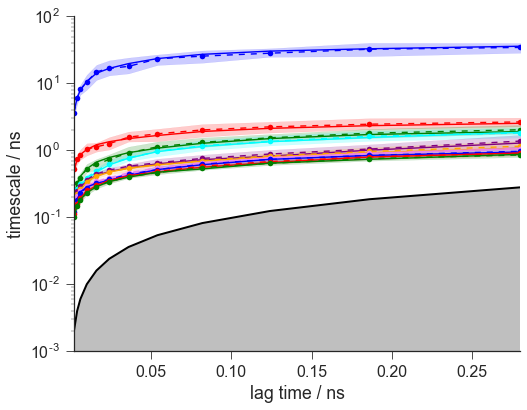

In [19]:
mplt.plot_implied_timescales(its_wt, ylog=True, units='ns', dt=0.002)
sbn.despine()

## 4. MSM

In [20]:
M_mut_bayes = msm.bayesian_markov_model(dtrajs_mut, 50, dt_traj='10 ps')

In [21]:
M_wt_bayes = msm.bayesian_markov_model(dtrajs_wt, 50, dt_traj='2 ps')

### Finding extrema of the MSMs

In [22]:
l2 = M_mut_bayes.eigenvectors_left()[1]
l3 = M_mut_bayes.eigenvectors_left()[2]
l2_min_val = argmin(l2)
l2_max_val = argmax(l2)
l3_min_val = argmin(l3)
l3_max_val = argmax(l3)
print 'minimum of second left eigenvector %d' %l2_min_val
print 'maximum of second left eigenvector %d' %l2_max_val
print 'minimum of third left eigenvector %d' %l3_min_val
print 'maximum of third left eigenvector %d' %l3_max_val

minimum of second left eigenvector 3
maximum of second left eigenvector 1
minimum of third left eigenvector 40
maximum of third left eigenvector 1


In [23]:
l2_wt = M_wt_bayes.eigenvectors_left()[1]
l3_wt = M_wt_bayes.eigenvectors_left()[2]
l2_wt_min_val = argmin(l2_wt)
l2_wt_max_val = argmax(l2_wt)
l3_wt_min_val = argmin(l3_wt)
l3_wt_max_val = argmax(l3_wt)
print 'minimum of second left eigenvector %d' %l2_wt_min_val
print 'maximum of second left eigenvector %d' %l2_wt_max_val
print 'minimum of third left eigenvector %d' %l3_wt_min_val
print 'maximum of third left eigenvector %d' %l3_wt_max_val

minimum of second left eigenvector 11
maximum of second left eigenvector 15
minimum of third left eigenvector 15
maximum of third left eigenvector 45


## 5. WT analysis

### WT per micostate cluster dihedral histogram analysis 

In [24]:
per_state_chi_phe_wt = get_per_state_dihedrals(dtrajs_wt, wt_dihedral, 0)
per_state_chi_ser_wt = get_per_state_dihedrals(dtrajs_wt, wt_dihedral, 1)
per_state_chi_arg_wt = get_per_state_dihedrals(dtrajs_wt, wt_dihedral, 2)
per_state_chi_met_wt = get_per_state_dihedrals(dtrajs_wt, wt_dihedral, 3)
per_state_chi2_met_wt = get_per_state_dihedrals(dtrajs_wt, wt_dihedral, 4)
per_state_chi3_arg_wt = get_per_state_dihedrals(dtrajs_wt, wt_dihedral, 5)
per_state_chi2_phe_wt = get_per_state_dihedrals(dtrajs_wt, wt_dihedral, 6)

#### Slowest process

Plotting all per state histograms for the WT protein

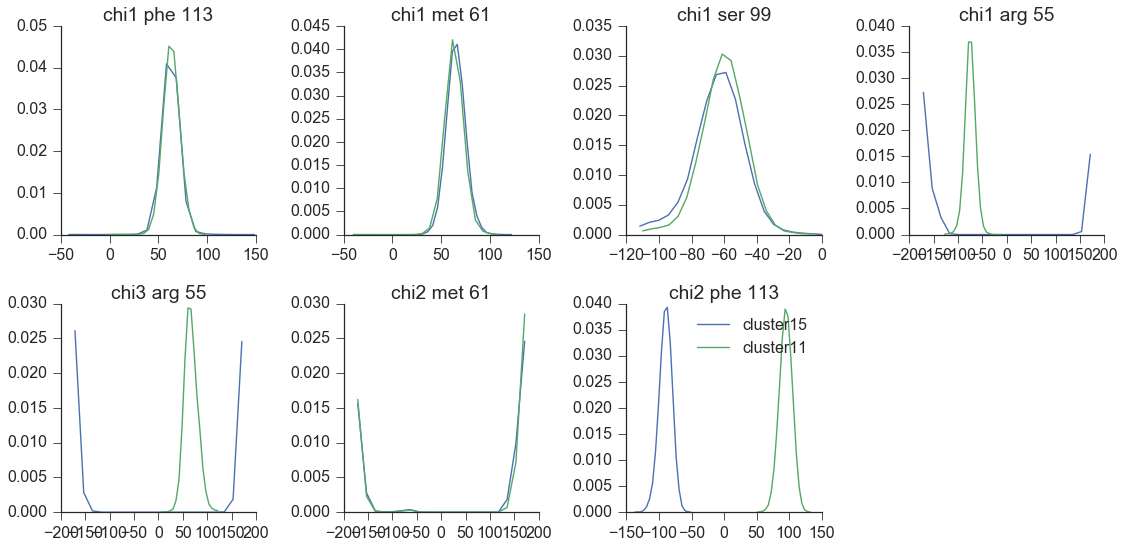

In [25]:
b1,y1 = hist_state_plot(per_state_chi_phe_wt,l2_wt_min_val)
b,y = hist_state_plot(per_state_chi_phe_wt,l2_wt_max_val)
fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(2, 4, 1)
ax.plot(b,y, '-')
ax.plot(b1,y1, '-')
ax.set_title('chi1 phe 113')

b1,y1 = hist_state_plot(per_state_chi_met_wt,l2_wt_min_val)
b,y = hist_state_plot(per_state_chi_met_wt,l2_wt_max_val)
ax = fig.add_subplot(2, 4, 2)
ax.plot(b,y, '-')
ax.plot(b1,y1, '-')
ax.set_title('chi1 met 61')

b1,y1 = hist_state_plot(per_state_chi_ser_wt,l2_wt_min_val)
b,y = hist_state_plot(per_state_chi_ser_wt,l2_wt_max_val)
ax = fig.add_subplot(2, 4, 3)
ax.plot(b,y, '-')
ax.plot(b1,y1, '-')
ax.set_title('chi1 ser 99')

b1,y1 = hist_state_plot(per_state_chi_arg_wt,l2_wt_min_val)
b,y = hist_state_plot(per_state_chi_arg_wt,l2_wt_max_val)
ax = fig.add_subplot(2, 4, 4)
ax.plot(b,y, '-')
ax.plot(b1,y1, '-')
ax.set_title('chi1 arg 55')

b1,y1 = hist_state_plot(per_state_chi3_arg_wt,l2_wt_min_val)
b,y = hist_state_plot(per_state_chi3_arg_wt,l2_wt_max_val)
ax = fig.add_subplot(2, 4, 5)
ax.plot(b,y, '-')
ax.plot(b1,y1, '-')
ax.set_title('chi3 arg 55')

b1,y1 = hist_state_plot(per_state_chi2_met_wt,l2_wt_min_val)
b,y = hist_state_plot(per_state_chi2_met_wt,l2_wt_max_val)
ax = fig.add_subplot(2, 4, 6)
ax.plot(b,y, '-')
ax.plot(b1,y1, '-')
ax.set_title('chi2 met 61')

b1,y1 = hist_state_plot(per_state_chi2_phe_wt,l2_wt_min_val)
b,y = hist_state_plot(per_state_chi2_phe_wt,l2_wt_max_val)
ax = fig.add_subplot(2, 4, 7)
ax.plot(b,y, '-', label ='cluster'+str(l2_wt_max_val))
ax.plot(b1,y1, '-', label ='cluster'+str(l2_wt_min_val))
ax.set_title('chi2 phe 113')
ax.legend()
fig.tight_layout()
sbn.despine()

#### Second slowest process

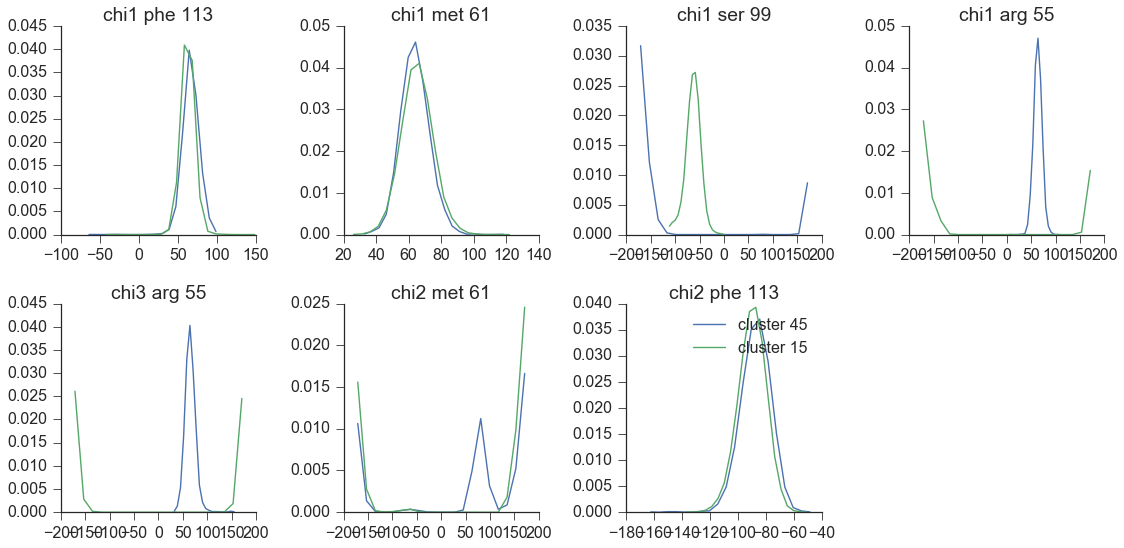

In [26]:
b1,y1 = hist_state_plot(per_state_chi_phe_wt,l3_wt_min_val)
b,y = hist_state_plot(per_state_chi_phe_wt,l3_wt_max_val)
fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(2, 4, 1)
ax.plot(b,y, '-')
ax.plot(b1,y1, '-')
ax.set_title('chi1 phe 113')

b1,y1 = hist_state_plot(per_state_chi_met_wt,l3_wt_min_val)
b,y = hist_state_plot(per_state_chi_met_wt,l3_wt_max_val)
ax = fig.add_subplot(2, 4, 2)
ax.plot(b,y, '-')
ax.plot(b1,y1, '-')
ax.set_title('chi1 met 61')

b1,y1 = hist_state_plot(per_state_chi_ser_wt,l3_wt_min_val)
b,y = hist_state_plot(per_state_chi_ser_wt,l3_wt_max_val)
ax = fig.add_subplot(2, 4, 3)
ax.plot(b,y, '-')
ax.plot(b1,y1, '-')
ax.set_title('chi1 ser 99')

b1,y1 = hist_state_plot(per_state_chi_arg_wt,l3_wt_min_val)
b,y = hist_state_plot(per_state_chi_arg_wt,l3_wt_max_val)
ax = fig.add_subplot(2, 4, 4)
ax.plot(b,y, '-')
ax.plot(b1,y1, '-')
ax.set_title('chi1 arg 55')

b1,y1 = hist_state_plot(per_state_chi3_arg_wt,l3_wt_min_val)
b,y = hist_state_plot(per_state_chi3_arg_wt,l3_wt_max_val)
ax = fig.add_subplot(2, 4, 5)
ax.plot(b,y, '-')
ax.plot(b1,y1, '-')
ax.set_title('chi3 arg 55')

b1,y1 = hist_state_plot(per_state_chi2_met_wt,l3_wt_min_val)
b,y = hist_state_plot(per_state_chi2_met_wt,l3_wt_max_val)
ax = fig.add_subplot(2, 4, 6)
ax.plot(b,y, '-')
ax.plot(b1,y1, '-')
ax.set_title('chi2 met 61')

b1,y1 = hist_state_plot(per_state_chi2_phe_wt,l3_wt_min_val)
b,y = hist_state_plot(per_state_chi2_phe_wt,l3_wt_max_val)
ax = fig.add_subplot(2, 4, 7)
ax.plot(b,y, '-', label ='cluster '+str(l3_wt_max_val))
ax.plot(b1,y1, '-', label ='cluster '+str(l3_wt_min_val))
ax.set_title('chi2 phe 113')
ax.legend()
fig.tight_layout()
sbn.despine()

### Coarse graining the WT MSMs

In [27]:
pcca_wt = M_wt_bayes.pcca(2)
pcca_sets_wt = pcca_wt.metastable_sets
print pcca_sets_wt

[array([ 1,  2,  4,  7, 10, 13, 14, 15, 16, 17, 18, 20, 21, 24, 25, 27, 29,
       30, 31, 34, 35, 36, 37, 39, 42, 45, 46, 47, 48, 50, 51, 55, 56, 58,
       60, 61, 63, 64, 65, 66, 67, 69, 71, 73, 76, 78, 81, 82, 85, 89, 90,
       92, 94, 95, 96, 97]), array([ 0,  3,  5,  6,  8,  9, 11, 12, 19, 22, 23, 26, 28, 32, 33, 38, 40,
       41, 43, 44, 49, 52, 53, 54, 57, 59, 62, 68, 70, 72, 74, 75, 77, 79,
       80, 83, 84, 86, 87, 88, 91, 93])]


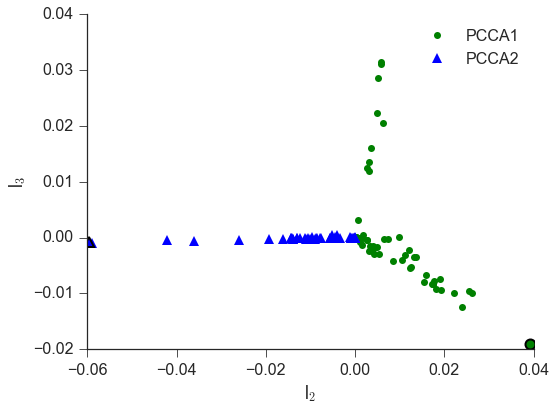

In [28]:
plt.plot(l2_wt[pcca_sets_wt[0]], l3_wt[pcca_sets_wt[0]], lw=0, marker='o', ms=7, label= 'PCCA1', color='green')
plt.plot(l2_wt[pcca_sets_wt[1]], l3_wt[pcca_sets_wt[1]], lw=0, marker='^', ms=10, label= 'PCCA2', color='blue')
plt.plot(l2_wt[11], l3_wt[11], marker='^', color='blue', ms=10, mec='black', mew=2)
plt.plot(l2_wt[15], l3_wt[15], marker='o', color='green', ms=10, mec='black', mew=2)
plt.xlabel(r'l$_2$')
plt.ylabel(r'l$_3$')
plt.legend()
sbn.despine()

### Per PCCA state dihedral distributions for the slowest process

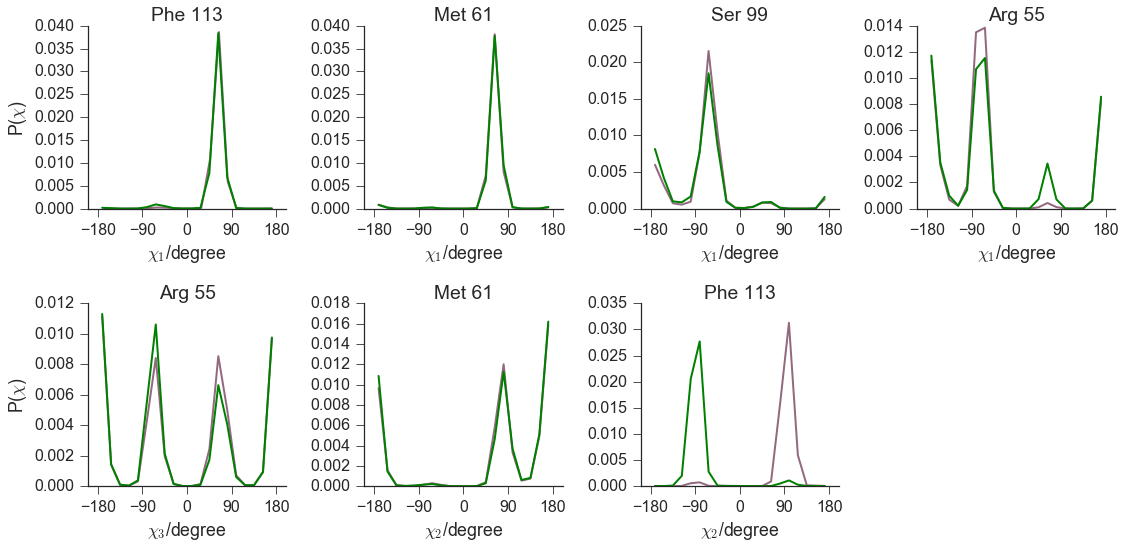

In [29]:
A = coarse_grained_states(pcca_sets_wt[0],per_state_chi_phe_wt)
B = coarse_grained_states(pcca_sets_wt[1],per_state_chi_phe_wt)
b1,y1 = hist_coarse_grained(A)
b,y = hist_coarse_grained(B)
fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(2, 4, 1)
ax.plot(b,y, '-', color='#936980', lw=2)
ax.plot(b1,y1, '-', color='green', lw=2)
ax.set_xticks([-180,-90,0,90,180])
ax.set_xlabel(r'$\chi_1$/degree')
ax.set_title('Phe 113')
ax.set_ylabel(r'P($\chi$)')

A = coarse_grained_states(pcca_sets_wt[0],per_state_chi_met_wt)
B = coarse_grained_states(pcca_sets_wt[1],per_state_chi_met_wt)
b1,y1 = hist_coarse_grained(A)
b,y = hist_coarse_grained(B)
ax = fig.add_subplot(2, 4, 2)
ax.plot(b,y, '-', color='#936980', lw=2)
ax.plot(b1,y1, '-', color='green', lw=2)
ax.set_xticks([-180,-90,0,90,180])
ax.set_xlabel(r'$\chi_1$/degree')
ax.set_title('Met 61')

A = coarse_grained_states(pcca_sets_wt[0],per_state_chi_ser_wt)
B = coarse_grained_states(pcca_sets_wt[1],per_state_chi_ser_wt)
b1,y1 = hist_coarse_grained(A)
b,y = hist_coarse_grained(B)
ax = fig.add_subplot(2, 4, 3)
ax.plot(b,y, '-', color='#936980', lw=2)
ax.plot(b1,y1, '-', color='green', lw=2)
ax.set_xticks([-180,-90,0,90,180])
ax.set_xlabel(r'$\chi_1$/degree')
ax.set_title('Ser 99')

A = coarse_grained_states(pcca_sets_wt[0],per_state_chi_arg_wt)
B = coarse_grained_states(pcca_sets_wt[1],per_state_chi_arg_wt)
b1,y1 = hist_coarse_grained(A)
b,y = hist_coarse_grained(B)
ax = fig.add_subplot(2, 4, 4)
ax.plot(b,y, '-', color='#936980', lw=2)
ax.plot(b1,y1, '-', color='green', lw=2)
ax.set_xticks([-180,-90,0,90,180])
ax.set_xlabel(r'$\chi_1$/degree')
ax.set_title('Arg 55')

A = coarse_grained_states(pcca_sets_wt[0],per_state_chi3_arg_wt)
B = coarse_grained_states(pcca_sets_wt[1],per_state_chi3_arg_wt)
b1,y1 = hist_coarse_grained(A)
b,y = hist_coarse_grained(B)
ax = fig.add_subplot(2, 4, 5)
ax.plot(b,y, '-', color='#936980', lw=2)
ax.plot(b1,y1, '-', color='green', lw=2)
ax.set_xticks([-180,-90,0,90,180])
ax.set_xlabel(r'$\chi_3$/degree')
ax.set_title('Arg 55')
ax.set_ylabel(r'P($\chi$)')

A = coarse_grained_states(pcca_sets_wt[0],per_state_chi2_met_wt)
B = coarse_grained_states(pcca_sets_wt[1],per_state_chi2_met_wt)
b1,y1 = hist_coarse_grained(A)
b,y = hist_coarse_grained(B)
ax = fig.add_subplot(2, 4, 6)
ax.plot(b,y, '-', color='#936980', lw=2)
ax.plot(b1,y1, '-', color='green', lw=2)
ax.set_xticks([-180,-90,0,90,180])
ax.set_xlabel(r'$\chi_2$/degree')
ax.set_title('Met 61')

A = coarse_grained_states(pcca_sets_wt[0],per_state_chi2_phe_wt)
B = coarse_grained_states(pcca_sets_wt[1],per_state_chi2_phe_wt)
b1,y1 = hist_coarse_grained(A)
b,y = hist_coarse_grained(B)
ax = fig.add_subplot(2, 4, 7)

ax.plot(b,y, '-', color='#936980', lw=2)
ax.plot(b1,y1, '-', color='green', lw=2)
ax.set_title('Phe 113')
ax.set_xlabel(r'$\chi_2$/degree')
ax.set_xticks([-180,-90,0,90,180])
plt.tight_layout()
#ax.legend(loc=3)
sbn.despine()

### Paper plot for the slowest process of WT MSM

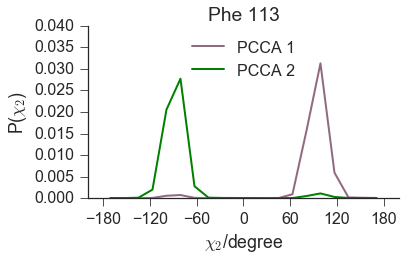

In [30]:
fig = figure(figsize=(6,4))
A = coarse_grained_states(pcca_sets_wt[0],per_state_chi2_phe_wt)
B = coarse_grained_states(pcca_sets_wt[1],per_state_chi2_phe_wt)
b1,y1 = hist_coarse_grained(A)
b,y = hist_coarse_grained(B)
plt.plot(b,y, '-', label ='PCCA 1', color='#936980', lw =2)
plt.plot(b1,y1, '-', label ='PCCA 2', color='green', lw=2)
plt.ylim([0,0.04])
plt.xticks([-180,-120,-60,0,60,120,180])
plt.title('Phe 113')
plt.xlabel(r'$\chi_2$/degree')
plt.ylabel(r'P($\chi_2$)')
plt.tight_layout()
plt.legend(loc=0)
sbn.despine()

## mean first passage times for coarse grained WT MSM

In [31]:
mean_sam, std_sam = mfpt(M_wt_bayes, pcca_sets_wt[0], pcca_sets_wt[1])
print 'Mean first passage time between pcca1 and pcca0 is %.4f ± %.4f ns'%(mean_sam*0.002, std_sam*0.002)
mean_sam, std_sam = mfpt(M_wt_bayes, pcca_sets_wt[1], pcca_sets_wt[0])
print 'Mean first passage time between pcca0 and pcca1 is %.4f ± %.4f ns'%(mean_sam*0.002, std_sam*0.002)

Mean first passage time between pcca1 and pcca0 is 92.0714 ± 10.4802 ns
Mean first passage time between pcca0 and pcca1 is 99.8597 ± 12.4181 ns


## 6. Mutant analysis 

### Mutant per micostate cluster dihedral histogram analysis 

In [32]:
per_state_chi_phe_mut = get_per_state_dihedrals(dtrajs_mut, mut_dihedral, 0)
per_state_chi_thr_mut = get_per_state_dihedrals(dtrajs_mut, mut_dihedral, 1)
per_state_chi_arg_mut = get_per_state_dihedrals(dtrajs_mut, mut_dihedral, 2)
per_state_chi_met_mut = get_per_state_dihedrals(dtrajs_mut, mut_dihedral, 3)
per_state_chi2_met_mut = get_per_state_dihedrals(dtrajs_mut, mut_dihedral, 5)
per_state_chi3_arg_mut = get_per_state_dihedrals(dtrajs_mut, mut_dihedral, 4)
per_state_chi2_phe_mut = get_per_state_dihedrals(dtrajs_mut, mut_dihedral, 6)

#### slowest process

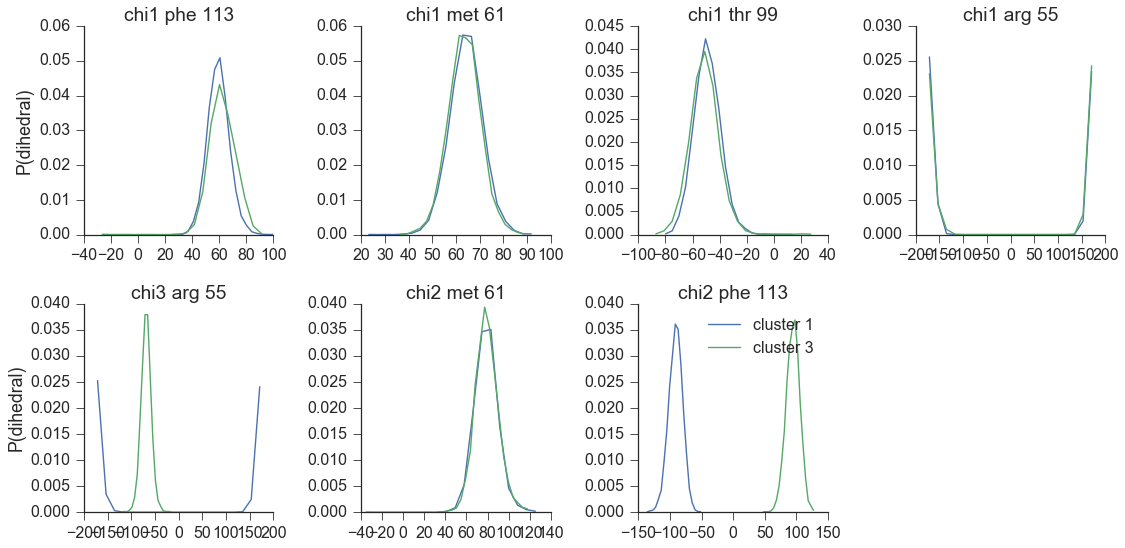

In [33]:
b1,y1 = hist_state_plot(per_state_chi_phe_mut,l2_min_val)
b,y = hist_state_plot(per_state_chi_phe_mut,l2_max_val)
fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(2, 4, 1)
ax.plot(b,y, '-')
ax.plot(b1,y1, '-')
ax.set_title('chi1 phe 113')
ax.set_ylabel('P(dihedral)')

b1,y1 = hist_state_plot(per_state_chi_met_mut,l2_min_val)
b,y = hist_state_plot(per_state_chi_met_mut, l2_max_val)
ax = fig.add_subplot(2, 4, 2)
ax.plot(b,y, '-')
ax.plot(b1,y1, '-')
ax.set_title('chi1 met 61')

b1,y1 = hist_state_plot(per_state_chi_thr_mut,l2_min_val)
b,y = hist_state_plot(per_state_chi_thr_mut,l2_max_val)
ax = fig.add_subplot(2, 4, 3)
ax.plot(b,y, '-')
ax.plot(b1,y1, '-')
ax.set_title('chi1 thr 99')

b1,y1 = hist_state_plot(per_state_chi_arg_mut,l2_min_val)
b,y = hist_state_plot(per_state_chi_arg_mut,l2_max_val)
ax = fig.add_subplot(2, 4, 4)
ax.plot(b,y, '-')
ax.plot(b1,y1, '-')
ax.set_title('chi1 arg 55')

b1,y1 = hist_state_plot(per_state_chi3_arg_mut,l2_min_val)
b,y = hist_state_plot(per_state_chi3_arg_mut,l2_max_val)
ax = fig.add_subplot(2, 4, 5)
ax.plot(b,y, '-')
ax.plot(b1,y1, '-')
ax.set_title('chi3 arg 55')
ax.set_ylabel('P(dihedral)')

b1,y1 = hist_state_plot(per_state_chi2_met_mut,l2_min_val)
b,y = hist_state_plot(per_state_chi2_met_mut,l2_max_val)
ax = fig.add_subplot(2, 4, 6)
ax.plot(b,y, '-')
ax.plot(b1,y1, '-')
ax.set_title('chi2 met 61')

b1,y1 = hist_state_plot(per_state_chi2_phe_mut,l2_min_val)
b,y = hist_state_plot(per_state_chi2_phe_mut,l2_max_val)
ax = fig.add_subplot(2, 4, 7)
ax.plot(b,y, '-', label ='cluster '+str(l2_max_val))
ax.plot(b1,y1, '-', label ='cluster '+str(l2_min_val))
ax.set_title('chi2 phe 113')
ax.legend()
sbn.despine()
plt.tight_layout()

#### second slowest process

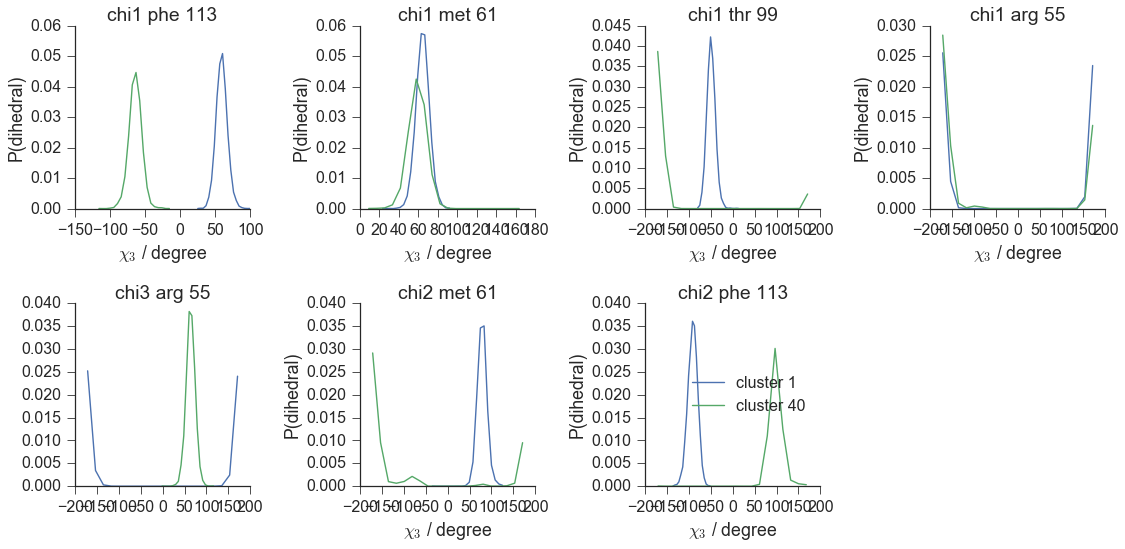

In [34]:
b1,y1 = hist_state_plot(per_state_chi_phe_mut,l3_min_val)
b,y = hist_state_plot(per_state_chi_phe_mut,l3_max_val)
fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(2, 4, 1)
ax.plot(b,y, '-')
ax.plot(b1,y1, '-')
ax.set_title('chi1 phe 113')
ax.set_xlabel(r'$\chi_3$ / degree')
ax.set_ylabel('P(dihedral)')

b1,y1 = hist_state_plot(per_state_chi_met_mut,l3_min_val)
b,y = hist_state_plot(per_state_chi_met_mut, l3_max_val)
ax = fig.add_subplot(2, 4, 2)
ax.plot(b,y, '-')
ax.plot(b1,y1, '-')
ax.set_title('chi1 met 61')
ax.set_xlabel(r'$\chi_3$ / degree')
ax.set_ylabel('P(dihedral)')

b1,y1 = hist_state_plot(per_state_chi_thr_mut,l3_min_val)
b,y = hist_state_plot(per_state_chi_thr_mut,l3_max_val)
ax = fig.add_subplot(2, 4, 3)
ax.plot(b,y, '-')
ax.plot(b1,y1, '-')
ax.set_title('chi1 thr 99')
ax.set_xlabel(r'$\chi_3$ / degree')
ax.set_ylabel('P(dihedral)')

b1,y1 = hist_state_plot(per_state_chi_arg_mut,l3_min_val)
b,y = hist_state_plot(per_state_chi_arg_mut,l3_max_val)
ax = fig.add_subplot(2, 4, 4)
ax.plot(b,y, '-')
ax.plot(b1,y1, '-')
ax.set_title('chi1 arg 55')
ax.set_xlabel(r'$\chi_3$ / degree')
ax.set_ylabel('P(dihedral)')

b1,y1 = hist_state_plot(per_state_chi3_arg_mut,l3_min_val)
b,y = hist_state_plot(per_state_chi3_arg_mut,l3_max_val)
ax = fig.add_subplot(2, 4, 5)
ax.plot(b,y, '-')
ax.plot(b1,y1, '-')
ax.set_title('chi3 arg 55')

b1,y1 = hist_state_plot(per_state_chi2_met_mut,l3_min_val)
b,y = hist_state_plot(per_state_chi2_met_mut,l3_max_val)
ax = fig.add_subplot(2, 4, 6)
ax.plot(b,y, '-')
ax.plot(b1,y1, '-')
ax.set_title('chi2 met 61')
ax.set_xlabel(r'$\chi_3$ / degree')
ax.set_ylabel('P(dihedral)')

b1,y1 = hist_state_plot(per_state_chi2_phe_mut,l3_min_val)
b,y = hist_state_plot(per_state_chi2_phe_mut,l3_max_val)
ax = fig.add_subplot(2, 4, 7)
ax.plot(b,y, '-', label ='cluster '+str(l3_max_val))
ax.plot(b1,y1, '-', label ='cluster '+str(l3_min_val))
ax.set_title('chi2 phe 113')
ax.set_xlabel(r'$\chi_3$ / degree')
ax.set_ylabel('P(dihedral)')
plt.tight_layout()
ax.legend(loc=0)
sbn.despine()

## Coarse graining the Mutant MSMs

In [35]:
pcca_mut = M_mut_bayes.pcca(4)
pcca_sets_mut = pcca_mut.metastable_sets
print pcca_sets_mut

[array([ 8, 23, 32, 38, 40, 43, 49, 52, 67, 74, 79, 94]), array([ 2,  7, 13, 14, 21, 24, 25, 30, 39, 42, 45, 55, 60, 62, 63, 64, 66,
       68, 70, 83, 85, 93, 95, 97]), array([ 1,  4, 10, 15, 16, 17, 18, 20, 27, 29, 31, 34, 35, 36, 37, 46, 47,
       48, 50, 54, 57, 59, 65, 72, 75, 77, 80, 81, 86, 90, 91, 96]), array([ 0,  3,  5,  6,  9, 11, 12, 19, 22, 26, 28, 33, 41, 44, 51, 53, 56,
       58, 61, 69, 71, 73, 76, 78, 82, 84, 87, 88, 89, 92])]


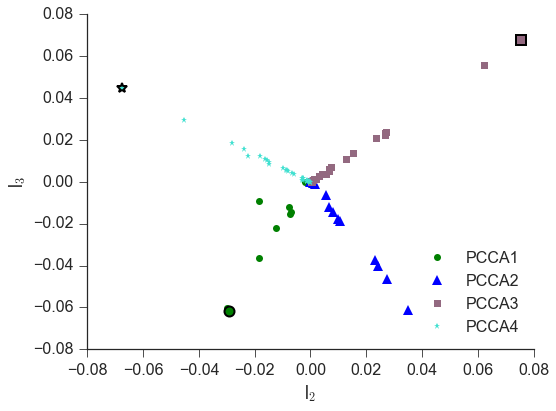

In [36]:
plt.plot(l2[pcca_sets_mut[0]], l3[pcca_sets_mut[0]], lw=0, marker='o', ms=7, label= 'PCCA1', color='green')
plt.plot(l2[pcca_sets_mut[1]], l3[pcca_sets_mut[1]], lw=0, marker='^', ms=10, label= 'PCCA2', color='blue')
plt.plot(l2[pcca_sets_mut[2]], l3[pcca_sets_mut[2]], lw=0, marker='s', ms=7, label= 'PCCA3', color='#936980')
plt.plot(l2[pcca_sets_mut[3]], l3[pcca_sets_mut[3]],lw=0, marker='*', ms=7, label= 'PCCA4', color='turquoise')
plt.plot(l2[3], l3[3], marker='*', color='turquoise', ms=10, mec='black', mew=2)
plt.plot(l2[1], l3[1], marker='s', color='#936980', ms=10, mec='black', mew=2)
plt.plot(l2[40], l3[40], marker='o', color='green', ms=10, mec='black', mew=2)
plt.xlabel(r'l$_2$')
plt.ylabel(r'l$_3$')
plt.legend(loc=4)
sbn.despine()

#### slowest process

/Users/toni_brain/miniconda3/envs/py2k/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


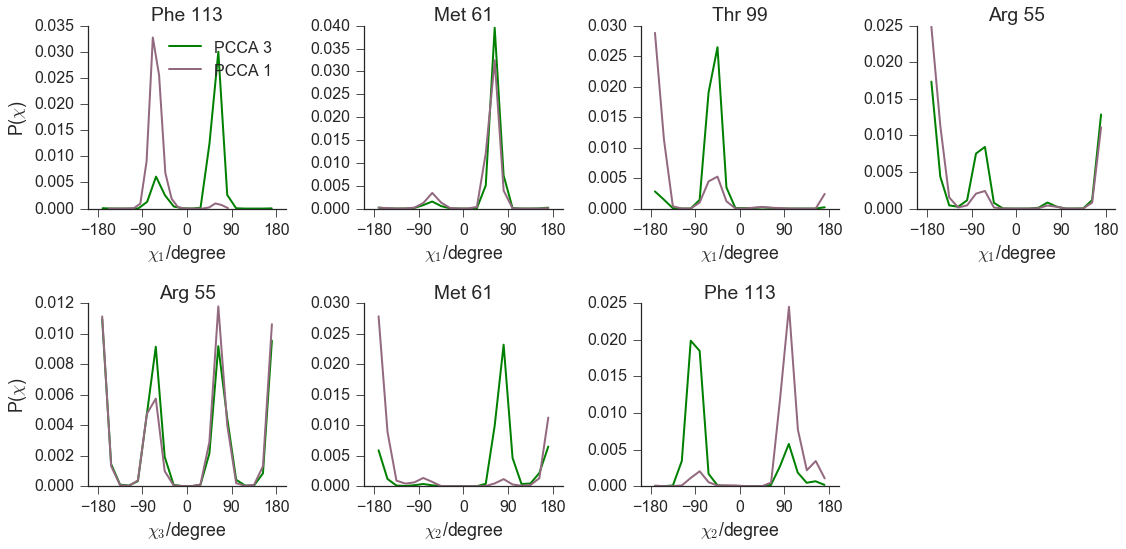

In [37]:
A = coarse_grained_states(pcca_sets_mut[0],per_state_chi_phe_mut)
B = coarse_grained_states(pcca_sets_mut[2],per_state_chi_phe_mut)
b1,y1 = hist_coarse_grained(A)
b,y = hist_coarse_grained(B)
fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(2, 4, 1)
ax.plot(b,y, '-', label = 'PCCA 3', color='green', lw=2)
ax.plot(b1,y1, '-', label = 'PCCA 1', color='#936980', lw=2)
ax.set_xticks([-180,-90,0,90,180])
ax.set_title('Phe 113')
ax.set_xlabel(r'$\chi_1$/degree')
ax.set_ylabel(r'P($\chi$)')


ax.legend(loc=0)

A = coarse_grained_states(pcca_sets_mut[0],per_state_chi_met_mut)
B = coarse_grained_states(pcca_sets_mut[2],per_state_chi_met_mut)
b1,y1 = hist_coarse_grained(A)
b,y = hist_coarse_grained(B)
ax = fig.add_subplot(2, 4, 2)
ax.plot(b,y, '-', color='green', lw=2)
ax.plot(b1,y1, '-', color='#936980', lw=2)
ax.set_xticks([-180,-90,0,90,180])
ax.set_title('Met 61')
ax.set_xlabel(r'$\chi_1$/degree')

A = coarse_grained_states(pcca_sets_mut[0],per_state_chi_thr_mut)
B = coarse_grained_states(pcca_sets_mut[2],per_state_chi_thr_mut)
b1,y1 = hist_coarse_grained(A)
b,y = hist_coarse_grained(B)
ax = fig.add_subplot(2, 4, 3)
ax.plot(b,y, '-', color='green', lw=2)
ax.plot(b1,y1, '-', color='#936980', lw=2)
ax.set_xticks([-180,-90,0,90,180])
ax.set_title('Thr 99')
ax.set_xlabel(r'$\chi_1$/degree')

A = coarse_grained_states(pcca_sets_mut[0],per_state_chi_arg_mut)
B = coarse_grained_states(pcca_sets_mut[2],per_state_chi_arg_mut)
b1,y1 = hist_coarse_grained(A)
b,y = hist_coarse_grained(B)
ax = fig.add_subplot(2, 4, 4)
ax.plot(b,y, '-', color='green', lw=2)
ax.plot(b1,y1, '-', color='#936980', lw=2)
ax.set_xticks([-180,-90,0,90,180])
ax.set_title('Arg 55')
ax.set_xlabel(r'$\chi_1$/degree')

A = coarse_grained_states(pcca_sets_mut[0],per_state_chi3_arg_mut)
B = coarse_grained_states(pcca_sets_mut[2],per_state_chi3_arg_mut)
b1,y1 = hist_coarse_grained(A)
b,y = hist_coarse_grained(B)
ax = fig.add_subplot(2, 4, 5)
ax.plot(b,y, '-', color='green', lw=2)
ax.plot(b1,y1, '-', color='#936980', lw=2)
ax.set_xticks([-180,-90,0,90,180])
ax.set_title('Arg 55')
ax.set_xlabel(r'$\chi_3$/degree')
ax.set_ylabel(r'P($\chi$)')

A = coarse_grained_states(pcca_sets_mut[0],per_state_chi2_met_mut)
B = coarse_grained_states(pcca_sets_mut[2],per_state_chi2_met_mut)
b1,y1 = hist_coarse_grained(A)
b,y = hist_coarse_grained(B)
ax = fig.add_subplot(2, 4, 6)
ax.plot(b,y, '-', color='green', lw=2)
ax.plot(b1,y1, '-', color='#936980', lw=2)
ax.set_xticks([-180,-90,0,90,180])
ax.set_title('Met 61')
ax.set_xlabel(r'$\chi_2$/degree')


A = coarse_grained_states(pcca_sets_mut[0],per_state_chi2_phe_mut)
B = coarse_grained_states(pcca_sets_mut[2],per_state_chi2_phe_mut)
b1,y1 = hist_coarse_grained(A)
b,y = hist_coarse_grained(B)
ax = fig.add_subplot(2, 4, 7)
ax.plot(b,y, '-', color='green', lw=2)
ax.plot(b1,y1, '-', color='#936980', lw=2)
ax.set_xticks([-180,-90,0,90,180])
ax.set_title('Phe 113')
ax.set_xlabel(r'$\chi_2$/degree')
plt.tight_layout()
ax.legend(loc=0)
sbn.despine()

####  second slowest process

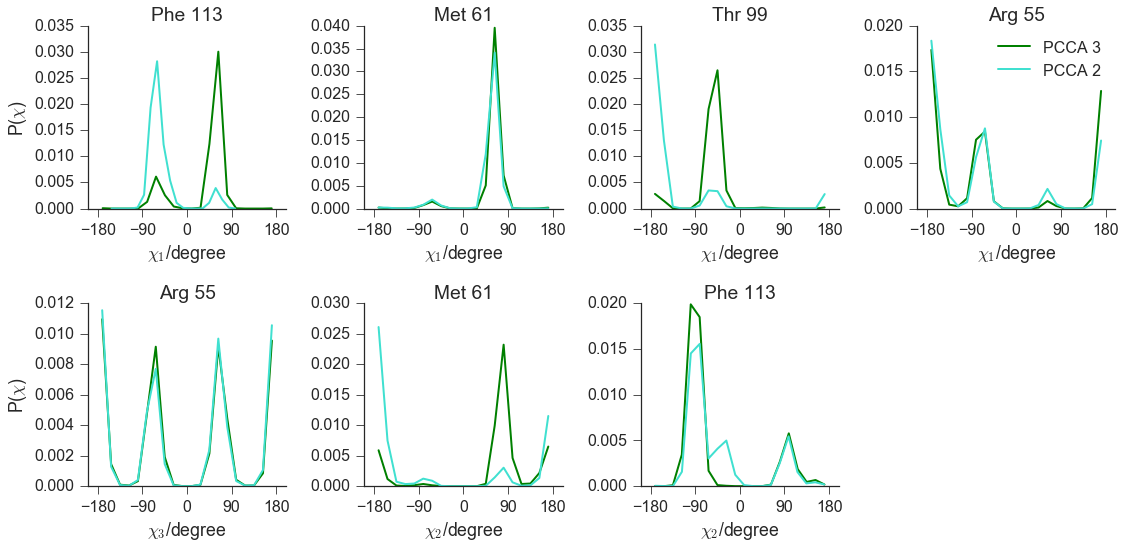

In [38]:
A = coarse_grained_states(pcca_sets_mut[1],per_state_chi_phe_mut)
B = coarse_grained_states(pcca_sets_mut[2],per_state_chi_phe_mut)
b1,y1 = hist_coarse_grained(A)
b,y = hist_coarse_grained(B)
fig = plt.figure(figsize=(16,8))  
ax = fig.add_subplot(2, 4, 1)
ax.plot(b,y, '-',  color='green', lw=2)
ax.plot(b1,y1, '-', color='turquoise', lw=2)
ax.set_xticks([-180,-90,0,90,180])
ax.set_title('Phe 113')
ax.set_xlabel(r'$\chi_1$/degree')
ax.set_ylabel(r'P($\chi$)')
ax.legend(loc=0)

A = coarse_grained_states(pcca_sets_mut[1],per_state_chi_met_mut)
B = coarse_grained_states(pcca_sets_mut[2],per_state_chi_met_mut)
b1,y1 = hist_coarse_grained(A)
b,y = hist_coarse_grained(B)
ax = fig.add_subplot(2, 4, 2)
ax.plot(b,y, '-', color='green', lw=2)
ax.plot(b1,y1, '-', color='turquoise', lw=2)
ax.set_xticks([-180,-90,0,90,180])
ax.set_title('Met 61')
ax.set_xlabel(r'$\chi_1$/degree')

A = coarse_grained_states(pcca_sets_mut[1],per_state_chi_thr_mut)
B = coarse_grained_states(pcca_sets_mut[2],per_state_chi_thr_mut)
b1,y1 = hist_coarse_grained(A)
b,y = hist_coarse_grained(B)
ax = fig.add_subplot(2, 4, 3)
ax.plot(b,y, '-', color='green', lw=2)
ax.plot(b1,y1, '-', color='turquoise', lw=2)
ax.set_xticks([-180,-90,0,90,180])
ax.set_title('Thr 99')
ax.set_xlabel(r'$\chi_1$/degree')

A = coarse_grained_states(pcca_sets_mut[1],per_state_chi_arg_mut)
B = coarse_grained_states(pcca_sets_mut[2],per_state_chi_arg_mut)
b1,y1 = hist_coarse_grained(A)
b,y = hist_coarse_grained(B)
ax = fig.add_subplot(2, 4, 4)
ax.plot(b,y, '-', color='green', lw=2, label = 'PCCA 3')
ax.plot(b1,y1, '-',  color='turquoise', lw=2, label = 'PCCA 2')
ax.set_xticks([-180,-90,0,90,180])
ax.set_title('Arg 55')
ax.set_xlabel(r'$\chi_1$/degree')
ax.legend(loc=0)

A = coarse_grained_states(pcca_sets_mut[1],per_state_chi3_arg_mut)
B = coarse_grained_states(pcca_sets_mut[2],per_state_chi3_arg_mut)
b1,y1 = hist_coarse_grained(A)
b,y = hist_coarse_grained(B)
ax = fig.add_subplot(2, 4, 5)
ax.plot(b,y, '-',  color='green', lw=2)
ax.plot(b1,y1, '-',  color='turquoise', lw=2)
ax.set_xticks([-180,-90,0,90,180])
ax.set_title('Arg 55')
ax.set_xlabel(r'$\chi_3$/degree')
ax.set_ylabel(r'P($\chi$)')

A = coarse_grained_states(pcca_sets_mut[1],per_state_chi2_met_mut)
B = coarse_grained_states(pcca_sets_mut[2],per_state_chi2_met_mut)
b1,y1 = hist_coarse_grained(A)
b,y = hist_coarse_grained(B)
ax = fig.add_subplot(2, 4, 6)
ax.plot(b,y, '-',  color='green', lw=2)
ax.plot(b1,y1, '-',  color='turquoise', lw=2)
ax.set_xticks([-180,-90,0,90,180])
ax.set_title('Met 61')
ax.set_xlabel(r'$\chi_2$/degree')

A = coarse_grained_states(pcca_sets_mut[1],per_state_chi2_phe_mut)
B = coarse_grained_states(pcca_sets_mut[2],per_state_chi2_phe_mut)
b1,y1 = hist_coarse_grained(A)
b,y = hist_coarse_grained(B)
ax = fig.add_subplot(2, 4, 7)
ax.plot(b,y, '-',  color='green', lw=2)
ax.plot(b1,y1, '-', color='turquoise', lw=2)
ax.set_xticks([-180,-90,0,90,180])
ax.set_title('Phe 113')
ax.set_xlabel(r'$\chi_2$/degree')
plt.tight_layout()
ax.legend(loc=0)
sbn.despine()

## Paper plot slowest and second slowest process combined

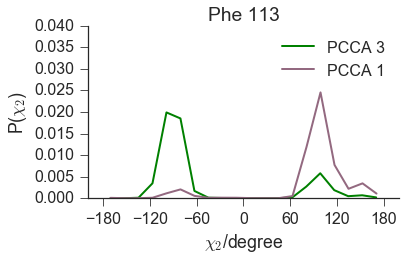

In [39]:
fig = figure(figsize=(6,4))
A = coarse_grained_states(pcca_sets_mut[0],per_state_chi2_phe_mut)
B = coarse_grained_states(pcca_sets_mut[2],per_state_chi2_phe_mut)
b1,y1 = hist_coarse_grained(A)
b,y = hist_coarse_grained(B)
plt.plot(b,y, '-', label ='PCCA 3', color='green', lw=2)
plt.plot(b1,y1, '-', label = 'PCCA 1', color='#936980', lw=2)
plt.ylim([0,0.04])
plt.title('Phe 113')
plt.xlabel(r'$\chi_2$/degree')
plt.ylabel(r'P($\chi_2$)')
plt.xticks([-180,-120,-60,0,60,120,180])
plt.tight_layout()
plt.legend(loc=0)
sbn.despine()

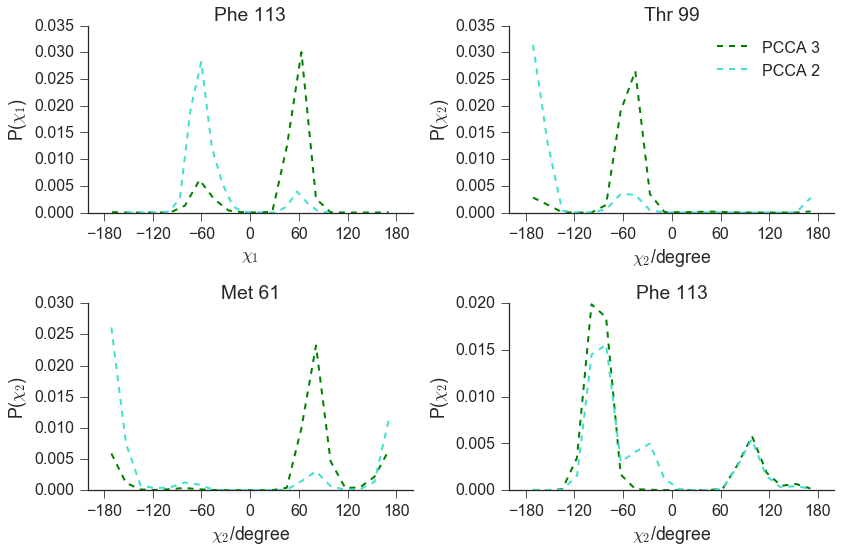

In [40]:
A = coarse_grained_states(pcca_sets_mut[1],per_state_chi_phe_mut)
B = coarse_grained_states(pcca_sets_mut[2],per_state_chi_phe_mut)
b1,y1 = hist_coarse_grained(A)
b,y = hist_coarse_grained(B)
fig = plt.figure(figsize=(12,8), dpi=300)  
ax = fig.add_subplot(2, 2, 1)
ax.plot(b,y, '--', color='green',lw=2)
ax.plot(b1,y1, '--', color='turquoise',lw=2)
ax.set_xticks([-180,-120,-60,0,60,120,180])
ax.set_xlabel(r'$\chi_1$')
ax.set_ylabel(r'P($\chi_1$)')
ax.set_title('Phe 113')


A = coarse_grained_states(pcca_sets_mut[1],per_state_chi_thr_mut)
B = coarse_grained_states(pcca_sets_mut[2],per_state_chi_thr_mut)
b1,y1 = hist_coarse_grained(A)
b,y = hist_coarse_grained(B)
ax = fig.add_subplot(2, 2, 2)
ax.plot(b,y, '--', color='green', label = 'PCCA 3',lw=2)
ax.plot(b1,y1, '--', color='turquoise', label ='PCCA 2',lw=2)
ax.set_xticks([-180,-120,-60,0,60,120,180])
ax.set_title('Thr 99')
ax.set_xlabel(r'$\chi_2$/degree')
ax.set_ylabel(r'P($\chi_2$)')
ax.legend(loc=1)


A = coarse_grained_states(pcca_sets_mut[1],per_state_chi2_met_mut)
B = coarse_grained_states(pcca_sets_mut[2],per_state_chi2_met_mut)
b1,y1 = hist_coarse_grained(A)
b,y = hist_coarse_grained(B)
ax = fig.add_subplot(2, 2, 3)
ax.plot(b,y, '--', color='green', lw=2)
ax.plot(b1,y1, '--', color='turquoise', lw=2)
ax.set_xticks([-180,-120,-60,0,60,120,180])
ax.set_xlabel(r'$\chi_2$/degree')
ax.set_ylabel(r'P($\chi_2$)')
ax.set_title('Met 61')

A = coarse_grained_states(pcca_sets_mut[1],per_state_chi2_phe_mut)
B = coarse_grained_states(pcca_sets_mut[2],per_state_chi2_phe_mut)
b1,y1 = hist_coarse_grained(A)
b,y = hist_coarse_grained(B)
ax = fig.add_subplot(2, 2, 4)
ax.plot(b,y, '--',  color='green', lw=2)
ax.plot(b1,y1, '--',  color='turquoise',lw=2)
ax.set_xticks([-180,-120,-60,0,60,120,180])
ax.set_xlabel(r'$\chi_2$/degree')
ax.set_ylabel(r'P($\chi_2$)')
ax.set_title('Phe 113')
plt.tight_layout()
sbn.despine()

## mean first passage times

In [41]:
samples = M_mut_bayes.sample_f('mfpt' ,pcca_sets_mut[1], pcca_sets_mut[0])

In [42]:
mean_sam, std_sam = mfpt(M_mut_bayes, pcca_sets_mut[1], pcca_sets_mut[0])
print 'Mean first passage time between pcca1 and pcca0 is %.4f ± %.4f ns'%(mean_sam*0.01, std_sam*0.01)
mean_sam, std_sam = mfpt(M_mut_bayes, pcca_sets_mut[0], pcca_sets_mut[1])
print 'Mean first passage time between pcca0 and pcca1 is %.4f ± %.4f ns'%(mean_sam*0.01, std_sam*0.01)
mean_sam, std_sam = mfpt(M_mut_bayes, pcca_sets_mut[1], pcca_sets_mut[2])
print 'Mean first passage time between pcca1 and pcca2 is %.4f ± %.4f ns'%(mean_sam*0.01, std_sam*0.01)
mean_sam, std_sam = mfpt(M_mut_bayes, pcca_sets_mut[2], pcca_sets_mut[1])
print 'Mean first passage time between pcca2 and pcca1 is %.4f ± %.4f ns'%(mean_sam*0.01, std_sam*0.01)
mean_sam, std_sam = mfpt(M_mut_bayes, pcca_sets_mut[1], pcca_sets_mut[3])
print 'Mean first passage time between pcca1 and pcca3 is %.4f ± %.4f ns'%(mean_sam*0.01, std_sam*0.01)
mean_sam, std_sam = mfpt(M_mut_bayes, pcca_sets_mut[3], pcca_sets_mut[1])
print 'Mean first passage time between pcca3 and pcca1 is %.4f ± %.4f ns'%(mean_sam*0.01, std_sam*0.01)
mean_sam, std_sam = mfpt(M_mut_bayes, pcca_sets_mut[0], pcca_sets_mut[2])
print 'Mean first passage time between pcca0 and pcca2 is %.4f ± %.4f ns'%(mean_sam*0.01, std_sam*0.01)
mean_sam, std_sam = mfpt(M_mut_bayes, pcca_sets_mut[2], pcca_sets_mut[0])
print 'Mean first passage time between pcca2 and pcca0 is %.4f ± %.4f ns'%(mean_sam*0.01, std_sam*0.01)
mean_sam, std_sam = mfpt(M_mut_bayes, pcca_sets_mut[0], pcca_sets_mut[3])
print 'Mean first passage time between pcca0 and pcca3 is %.4f ± %.4f ns'%(mean_sam*0.01, std_sam*0.01)
mean_sam, std_sam = mfpt(M_mut_bayes, pcca_sets_mut[3], pcca_sets_mut[0])
print 'Mean first passage time between pcca3 and pcca0 is %.4f ± %.4f ns'%(mean_sam*0.01, std_sam*0.01)
mean_sam, std_sam = mfpt(M_mut_bayes, pcca_sets_mut[2], pcca_sets_mut[3])
print 'Mean first passage time between pcca2 and pcca3 is %.4f ± %.4f ns'%(mean_sam*0.01, std_sam*0.01)
mean_sam, std_sam = mfpt(M_mut_bayes, pcca_sets_mut[3], pcca_sets_mut[2])
print 'Mean first passage time between pcca2 and pcca3 is %.4f ± %.4f ns'%(mean_sam*0.01, std_sam*0.01)

Mean first passage time between pcca1 and pcca0 is 695.4754 ± 88.7488 ns
Mean first passage time between pcca0 and pcca1 is 644.9597 ± 79.1338 ns
Mean first passage time between pcca1 and pcca2 is 705.8157 ± 96.5976 ns
Mean first passage time between pcca2 and pcca1 is 462.8825 ± 63.3433 ns
Mean first passage time between pcca1 and pcca3 is 1143.6973 ± 107.6540 ns
Mean first passage time between pcca3 and pcca1 is 862.7015 ± 85.5206 ns
Mean first passage time between pcca0 and pcca2 is 1080.3003 ± 128.5951 ns
Mean first passage time between pcca2 and pcca0 is 891.0497 ± 101.4092 ns
Mean first passage time between pcca0 and pcca3 is 713.7705 ± 78.1132 ns
Mean first passage time between pcca3 and pcca0 is 383.5300 ± 50.9875 ns
Mean first passage time between pcca2 and pcca3 is 1224.7010 ± 124.4192 ns
Mean first passage time between pcca2 and pcca3 is 1196.6277 ± 126.0649 ns
